In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [2]:
data = pd.read_csv("ab_browser_test.csv")
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:
data.slot.value_counts()

control    284554
exp        281580
Name: slot, dtype: int64

In [4]:
p = data[data['slot'] == 'control']['n_clicks'].sum() / 100

c = data[data['slot'] == 'control']['n_clicks'].sum() / p
e = data[data['slot'] == 'exp']['n_clicks'].sum() / p

print(round(e - c, 3))

1.614


In [5]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [6]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [7]:
np.random.seed(0)

control_scores = [np.median(t) for t in get_bootstrap_samples(data[data['slot'] == 'control']['n_clicks'].values, 500)]
exp_scores = [np.median(t) for t in get_bootstrap_samples(data[data['slot'] == 'exp']['n_clicks'].values, 500)]

difference = [t[0] - t[1] for t in zip(control_scores, exp_scores)]

print("95% confidence interval for the control group median:",  stat_intervals(control_scores, 0.05))
print("95% confidence interval for the exp group median:",  stat_intervals(exp_scores, 0.05))
print("95% confidence interval for the difference mean:",  stat_intervals(difference, 0.05))

95% confidence interval for the control group median: [ 4.  4.]
95% confidence interval for the exp group median: [ 5.  5.]
95% confidence interval for the difference mean: [-1. -1.]


In [8]:
np.random.seed(0)

control_scores = [np.mean(t) for t in get_bootstrap_samples(data[data['slot'] == 'control']['n_clicks'].values, 500)]
exp_scores = [np.mean(t) for t in get_bootstrap_samples(data[data['slot'] == 'exp']['n_clicks'].values, 500)]

difference = [t[0] - t[1] for t in zip(control_scores, exp_scores)]

print("95% confidence interval for the control group mean:",  stat_intervals(control_scores, 0.05))
print("95% confidence interval for the exp group mean:",  stat_intervals(exp_scores, 0.05))
print("95% confidence interval for the difference mean:",  stat_intervals(difference, 0.05))

95% confidence interval for the control group mean: [ 11.21313239  11.36811537]
95% confidence interval for the exp group mean: [ 11.50857137  11.6615223 ]
95% confidence interval for the difference mean: [-0.40844258 -0.19624905]


In [9]:
np.random.seed(0)
n_boot_samples = 500

control_boot_chi_squared = [np.sum((t - np.mean(t)) ** 2) for t in get_bootstrap_samples(data['n_clicks'].values, n_boot_samples)]

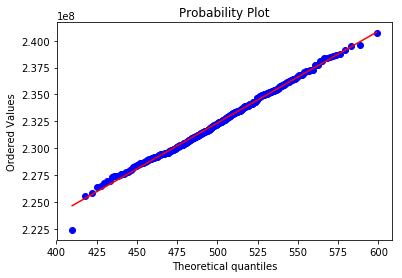

In [10]:
_, _ = stats.probplot(control_boot_chi_squared, dist="chi2", sparams=(n_boot_samples-1), plot=plt)
plt.show()

In [11]:
c = data[data['slot'] == 'control'].groupby('userID')['n_clicks'].sum()
e = data[data['slot'] == 'exp'].groupby('userID')['n_clicks'].sum()

In [12]:
stats.mannwhitneyu(c, e)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [13]:
data.browser.unique()

array(['Browser #2', 'Browser #4', 'Browser #14', 'Browser #17',
       'Browser #20', 'Browser #22'], dtype=object)

In [14]:
p = []
for b in data.browser.unique():
    c = data[data['slot'] == 'control'][data['browser'] == b]['n_clicks'].values
    e = data[data['slot'] == 'exp'][data['browser'] == b]['n_clicks'].values
    p.append(stats.mannwhitneyu(c, e).pvalue) 

C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\Public\PythonProjects\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [15]:
reject, p_corrected, a1, a2 = multipletests(p, alpha = 0.05, method = 'holm') 

In [17]:
print(reject)
len([t for t in reject if t == False])

[False False  True False False False]


5

In [18]:
c = data[data['slot'] == 'control']
e = data[data['slot'] == 'exp']

In [19]:
for b in data.browser.unique():
    print(b)
    print((c[c['browser'] == b]['n_nonclk_queries'].sum() / c[c['browser'] == b]['n_queries'].sum()) * 100)
    print((e[e['browser'] == b]['n_nonclk_queries'].sum() / e[e['browser'] == b]['n_queries'].sum()) * 100)
    print()

Browser #2
45.96274717919465
44.982746948554706

Browser #4
46.97092963514274
45.14294190358467

Browser #14
57.59041136008114
43.755617361273295

Browser #17
36.29936674628208
36.93741284866483

Browser #20
40.540484743383296
38.97737648371716

Browser #22
40.593976593513354
39.85394721969546

